Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [222]:
test           = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [3]:
datasets = [transactions, items, item_categories, shops]
[d.shape for d in datasets]    

[(2935849, 6), (22170, 3), (84, 2), (60, 2)]

In [4]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [65]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


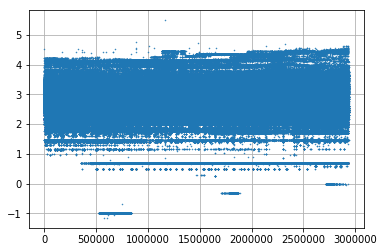

In [14]:
import matplotlib.pyplot as plt
plt.plot(np.log10(transactions.item_price), '.', markersize=1)
plt.grid(True)
plt.show()


In [20]:
transactions[(transactions.item_price<0).tolist()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [21]:
transactions.iloc[484683-5:484683+5]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484678,07.05.2013,4,32,3187,1249.0,1.0
484679,17.05.2013,4,32,3047,1299.0,1.0
484680,18.05.2013,4,32,3046,799.0,1.0
484681,07.05.2013,4,32,3017,299.0,1.0
484682,23.05.2013,4,32,2973,1249.0,1.0
484683,15.05.2013,4,32,2973,-1.0,1.0
484684,06.05.2013,4,32,2973,2499.0,1.0
484685,02.05.2013,4,32,2972,599.0,1.0
484686,18.05.2013,4,32,2967,399.0,1.0
484687,15.05.2013,4,32,2967,399.5,1.0


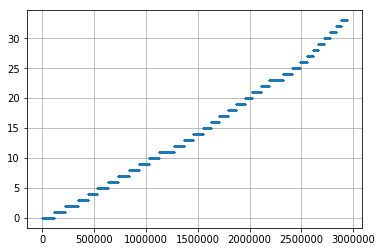

In [25]:
plt.plot(transactions.date_block_num, '.', markersize=.1)
plt.grid(True)
plt.show()

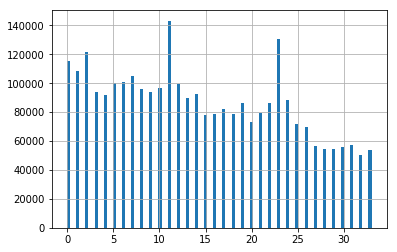

In [42]:
transactions.date_block_num.hist(bins=100)

In [39]:
s = transactions.date_block_num.value_counts().sort_index()

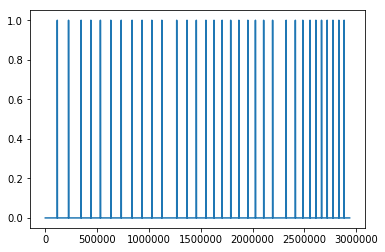

In [46]:
plt.plot(transactions.date_block_num.diff())
plt.show()

In [56]:
t = pd.to_datetime(transactions.date, dayfirst=True)

In [216]:
def f(d):
    return d.days

s = (t - t.iloc[0]).apply(f)
transactions['days'] = s

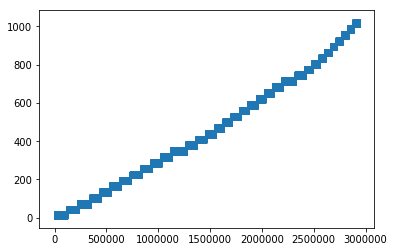

In [221]:
plt.plot(transactions.days, '.', markersize=1)
plt.show()

In [247]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [248]:
pair_count = test.groupby(['shop_id', 'item_id']).count()

In [250]:
transactions.head(15)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,m,date_p,days
0,02.01.2013,0,59,22154,999.00,1.0,0,2013-01-02,0
1,03.01.2013,0,25,2552,899.00,1.0,0,2013-01-03,1
2,05.01.2013,0,25,2552,899.00,-1.0,0,2013-01-05,3
3,06.01.2013,0,25,2554,1709.05,1.0,0,2013-01-06,4
4,15.01.2013,0,25,2555,1099.00,1.0,0,2013-01-15,13
5,10.01.2013,0,25,2564,349.00,1.0,0,2013-01-10,8
6,02.01.2013,0,25,2565,549.00,1.0,0,2013-01-02,0
7,04.01.2013,0,25,2572,239.00,1.0,0,2013-01-04,2
8,11.01.2013,0,25,2572,299.00,1.0,0,2013-01-11,9
9,03.01.2013,0,25,2573,299.00,3.0,0,2013-01-03,1


In [70]:
transactions.isnull().sum(
)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
revenue           0
dtype: int64

In [264]:
transactions['date_p'] = pd.to_datetime(transactions.date, dayfirst=True)
#transactions.date.apply(lambda d: datetime.datetime.strptime(d, '%d.%m.%Y'))

In [268]:
trans_gb_shop_item = transactions.groupby(['shop_id', 'item_id'])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=173480.0, right=173480.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=173472.0, right=173472.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=173470.0, right=173470.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=40095.0, right=40095.0
  'left=%s, right=%s')

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=173428.0, right=173428.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=40158.0, right=40158.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=175132.0, right=175132.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=40117.0, right=40117.0
  'left=%s, right=%s') %

KeyboardInterrupt: 

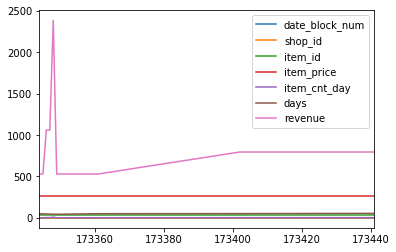

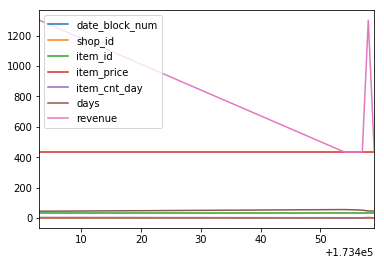

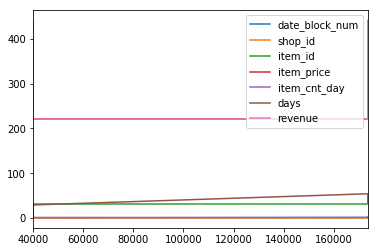

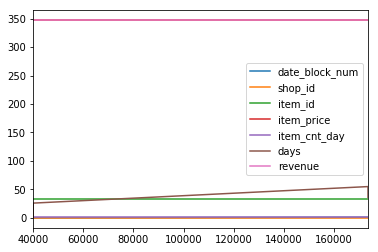

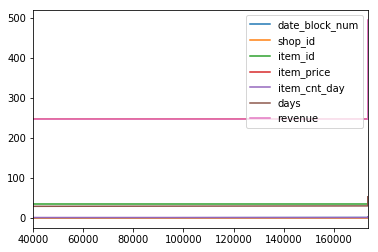

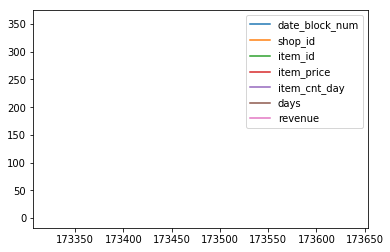

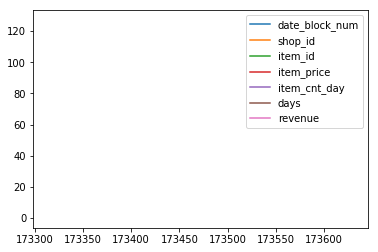

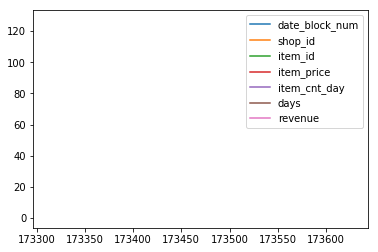

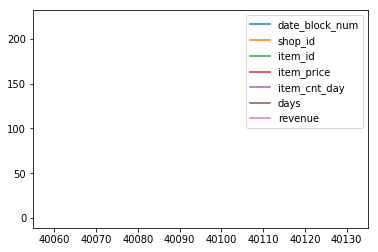

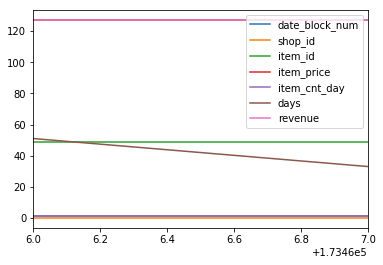

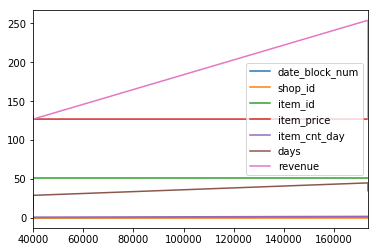

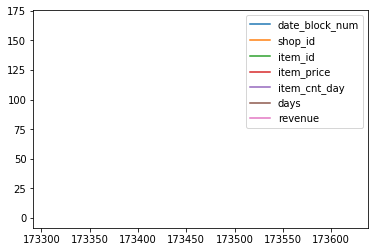

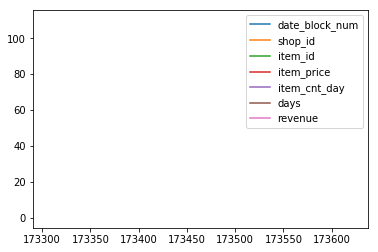

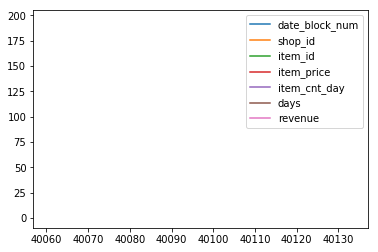

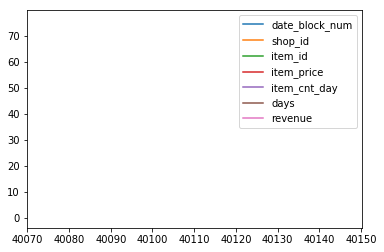

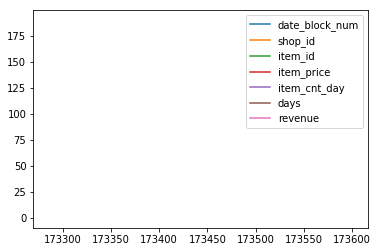

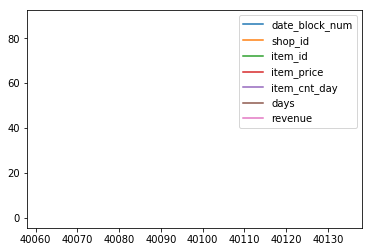

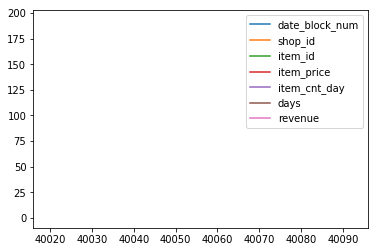

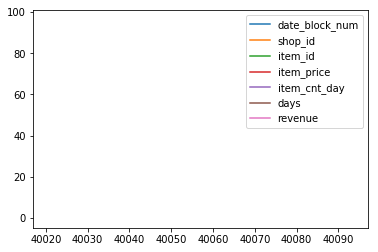

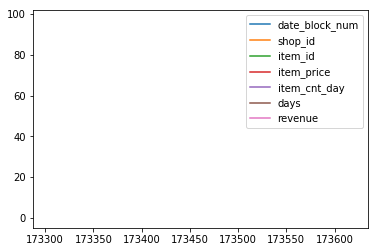

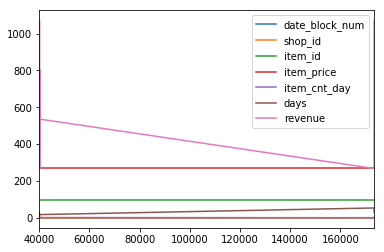

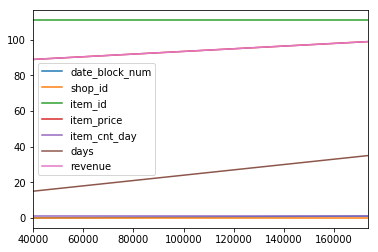

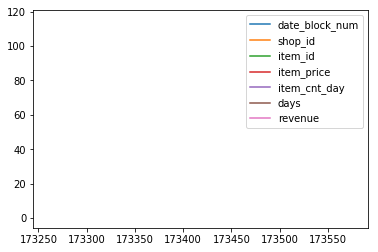

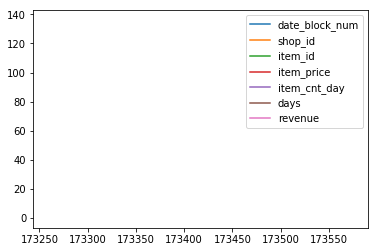

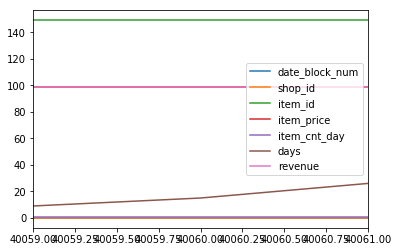

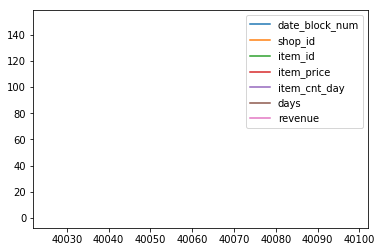

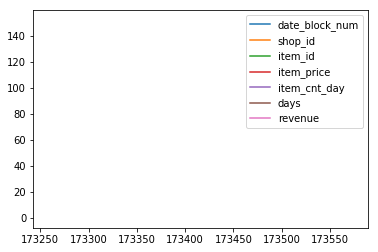

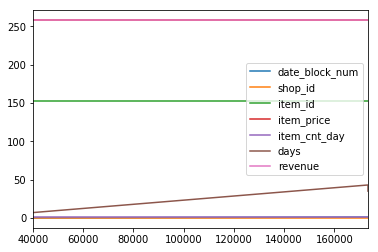

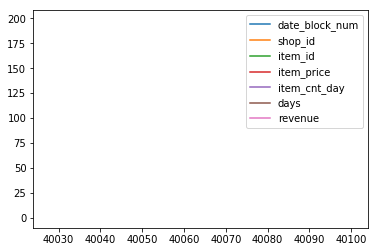

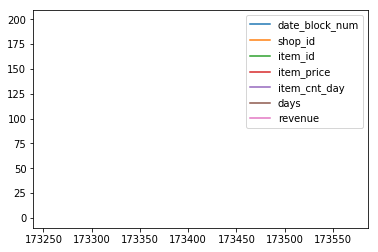

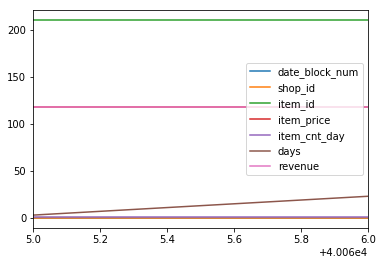

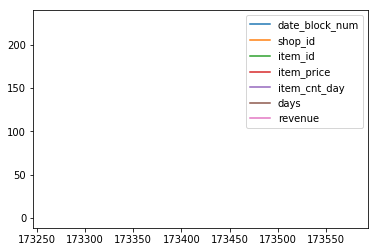

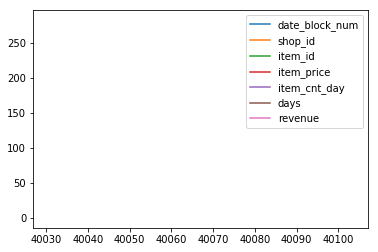

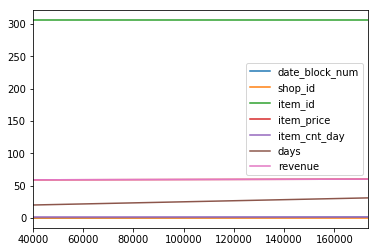

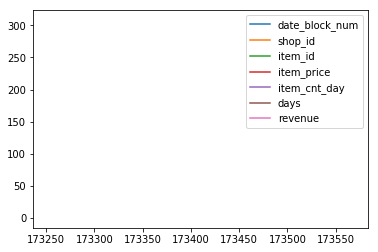

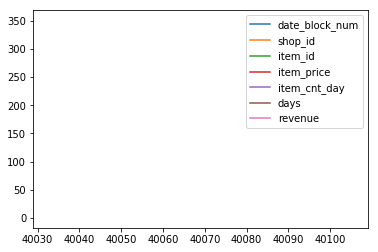

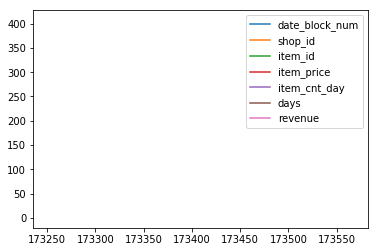

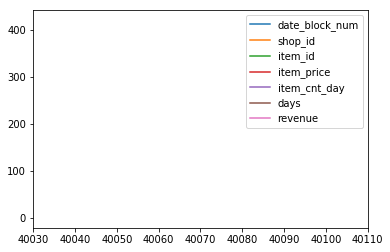

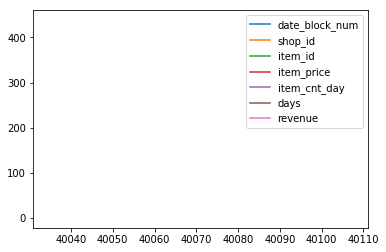

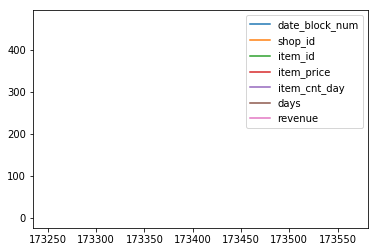

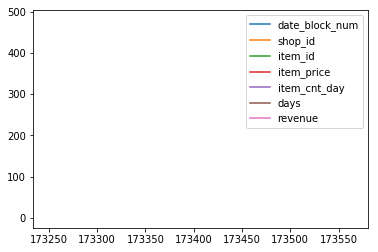

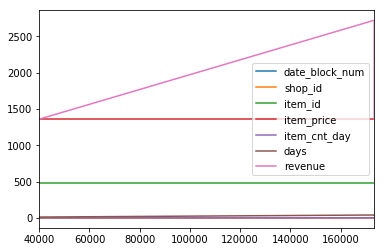

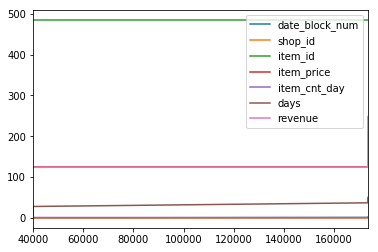

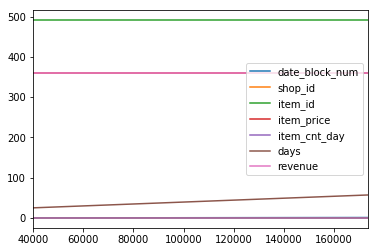

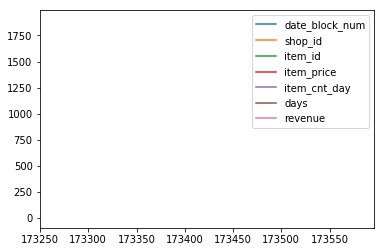

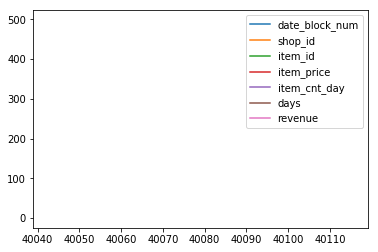

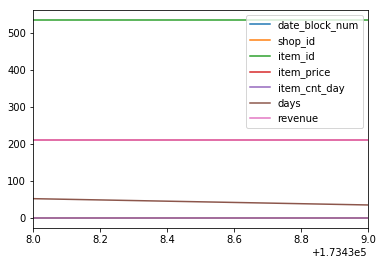

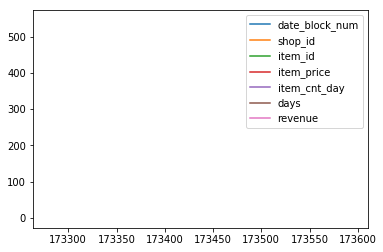

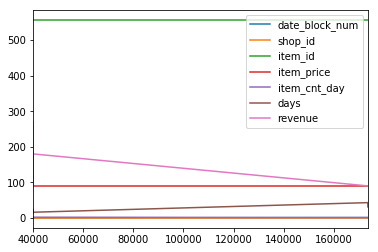

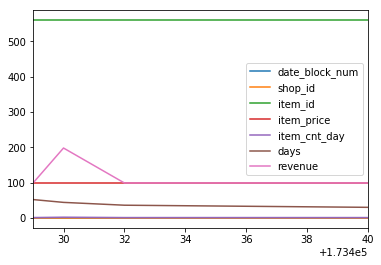

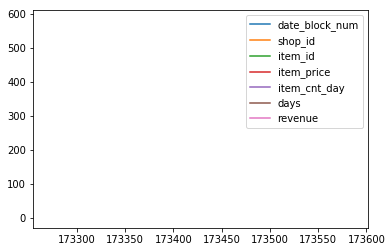

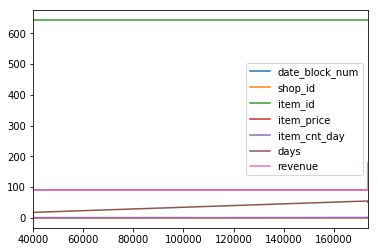

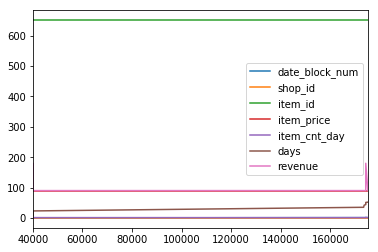

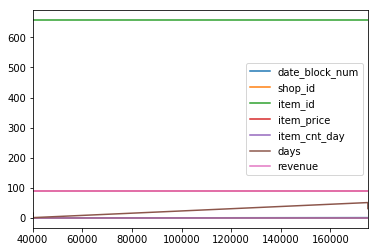

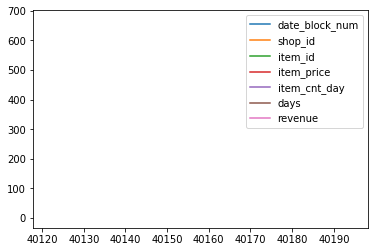

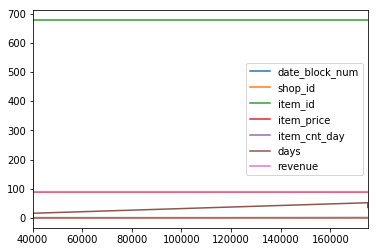

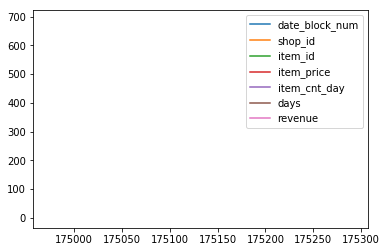

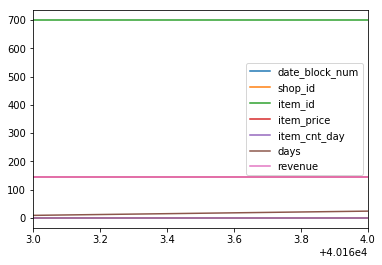

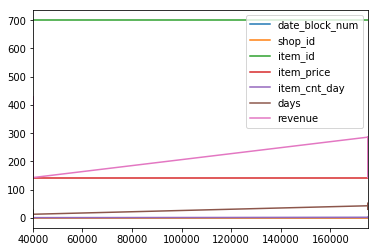

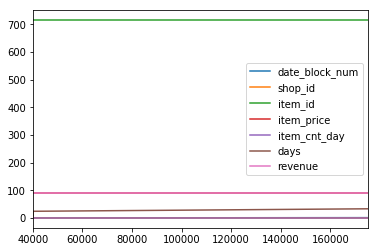

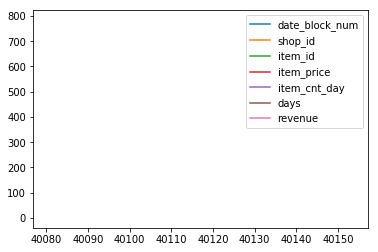

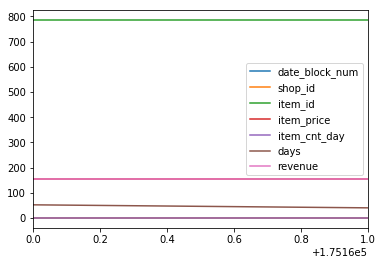

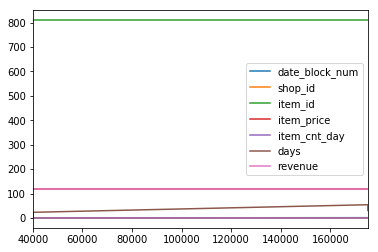

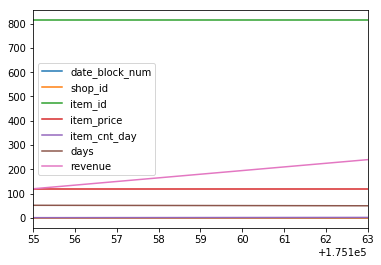

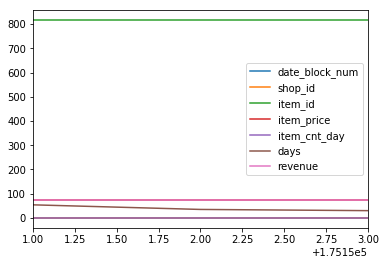

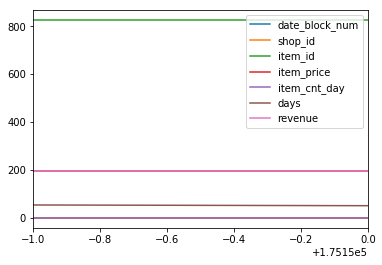

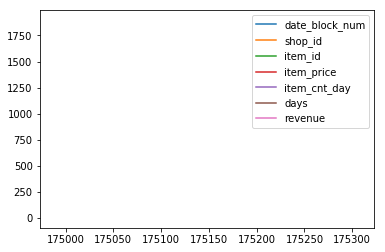

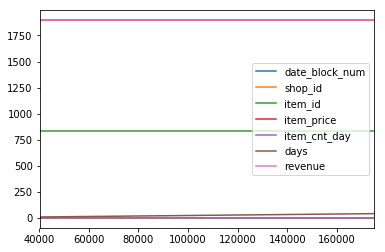

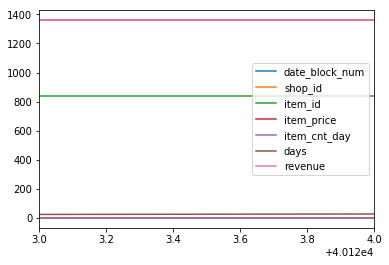

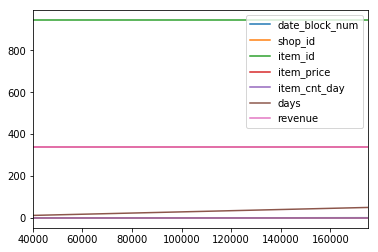

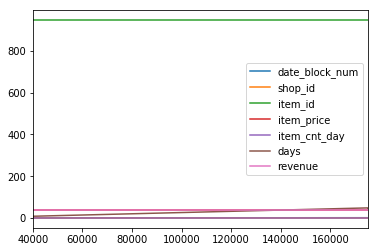

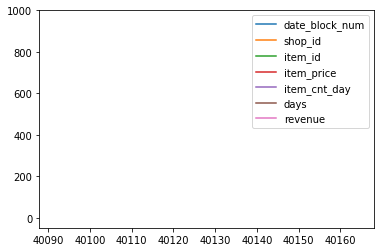

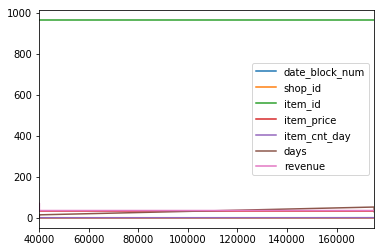

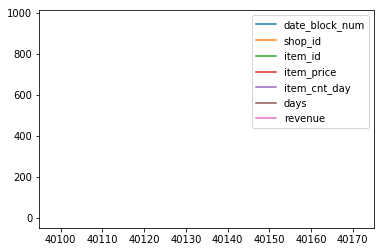

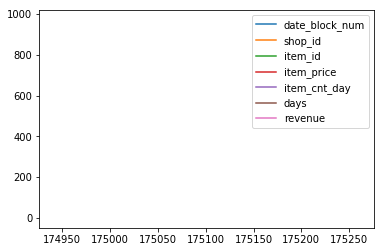

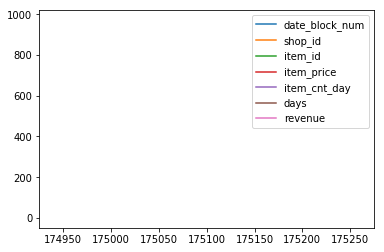

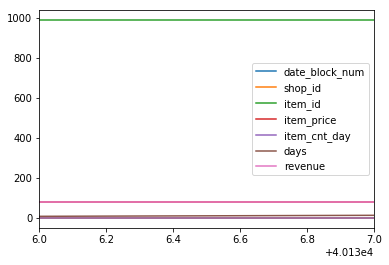

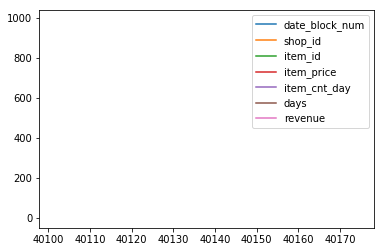

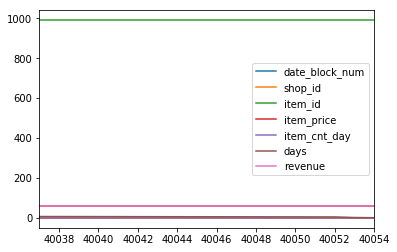

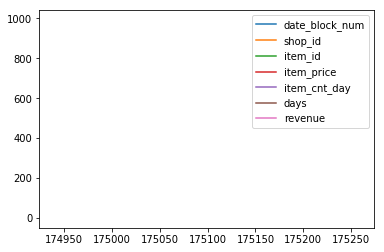

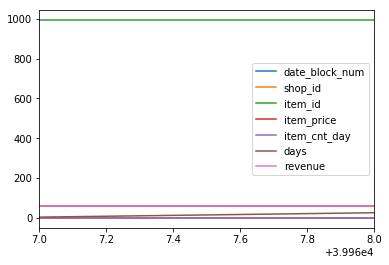

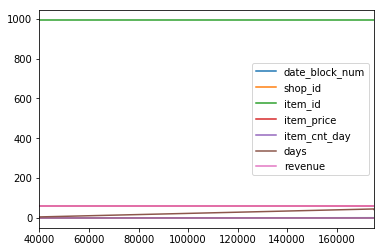

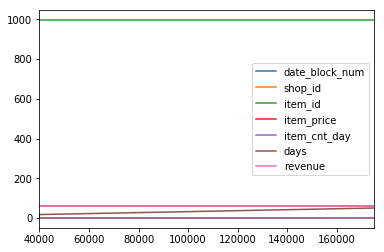

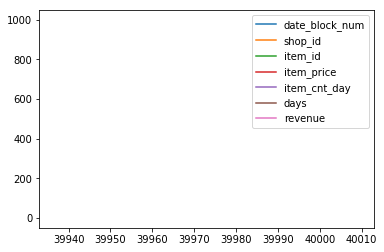

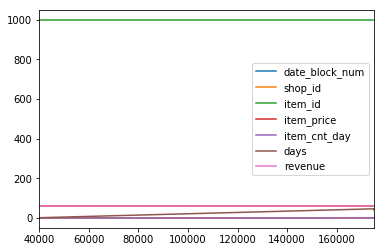

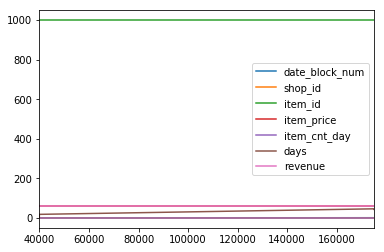

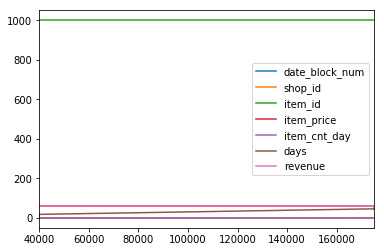

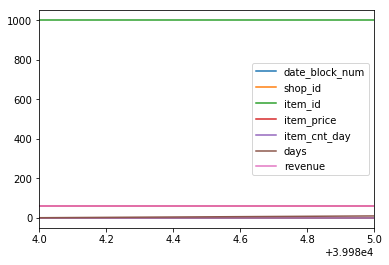

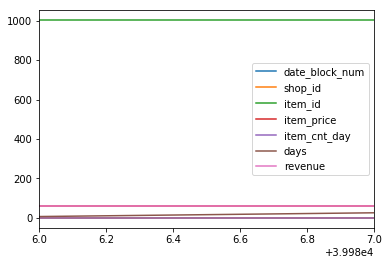

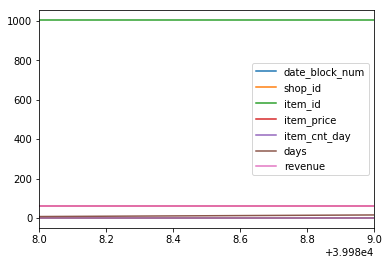

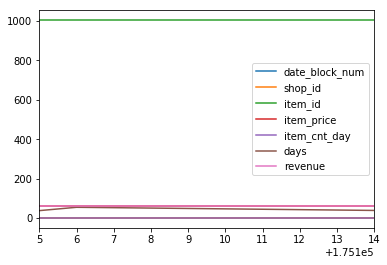

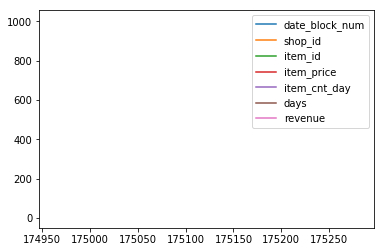

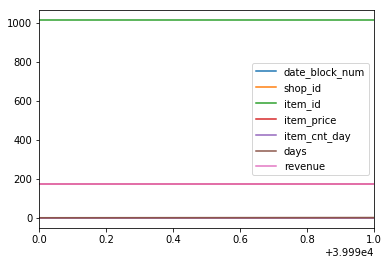

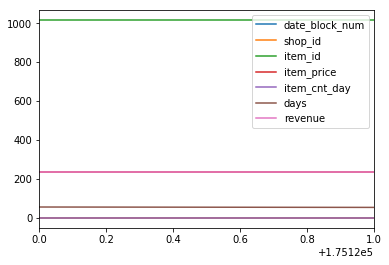

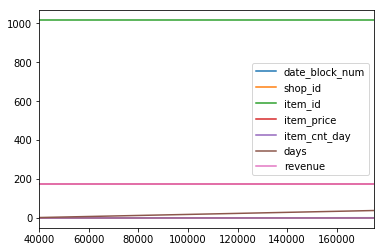

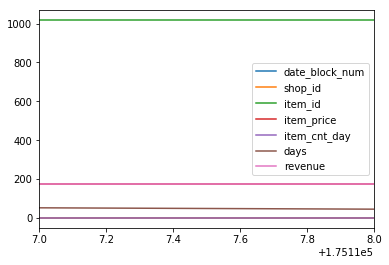

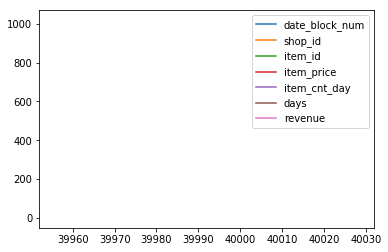

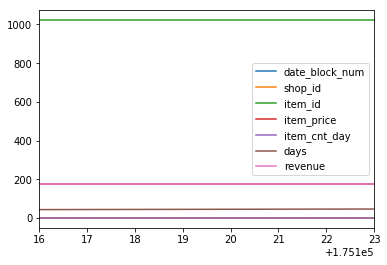

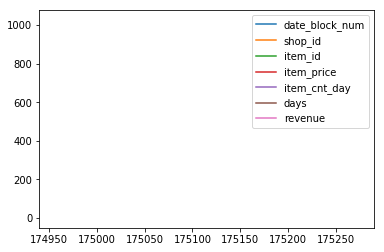

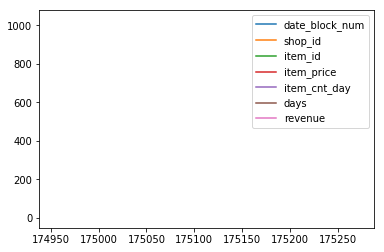

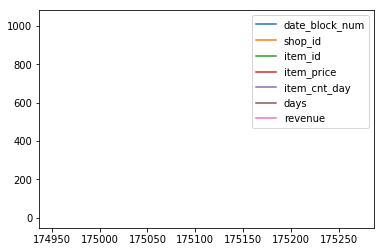

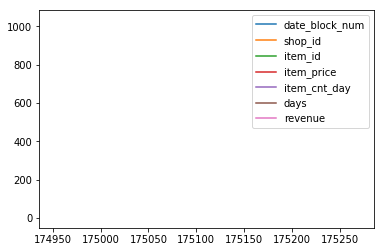

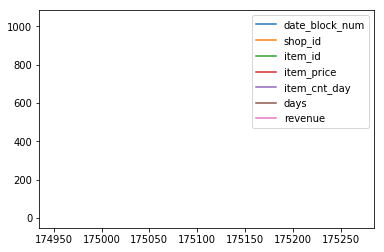

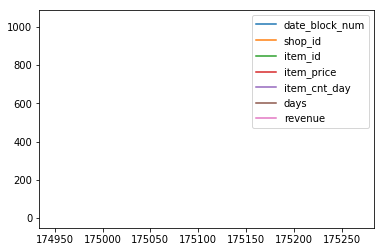

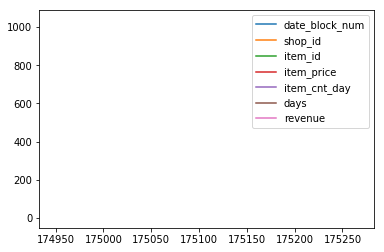

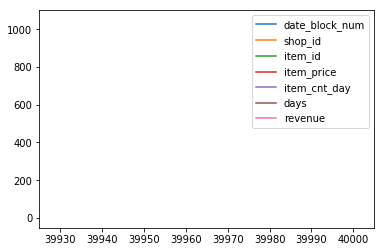

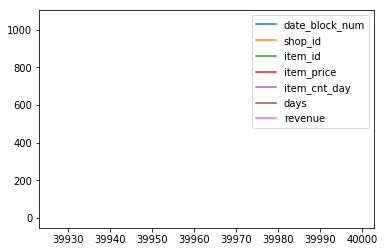

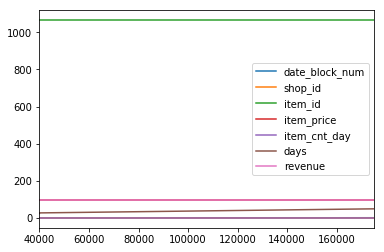

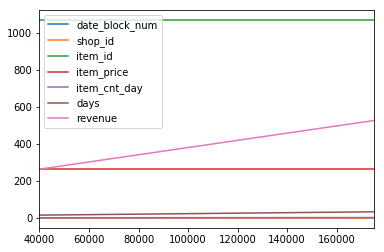

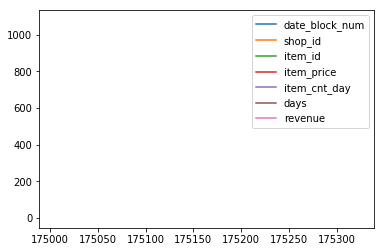

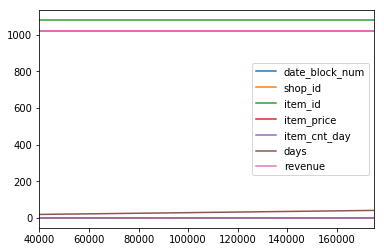

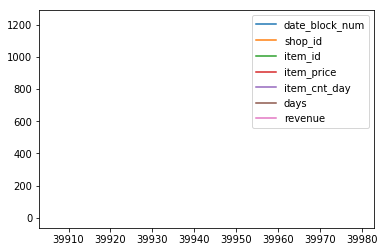

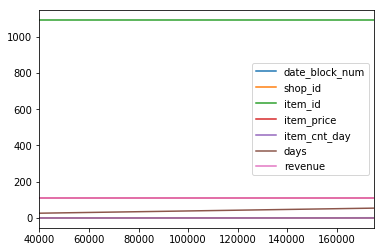

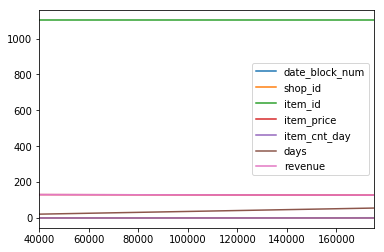

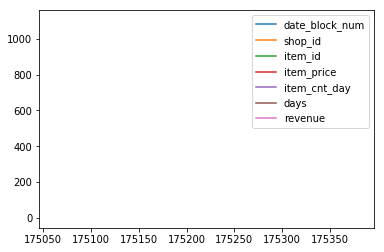

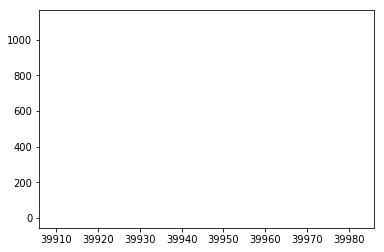

In [270]:
trans_gb_shop_item.plot()




Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [261]:
transactions['revenue'] = transactions.item_price * transactions.item_cnt_day
def parse_time(t):
    return [int(i) for i in t.split('.')]
date = transactions.date.apply(parse_time)
date = pd.DataFrame(date.tolist())
date.columns = ['d', 'm', 'y']
transactions_date = pd.concat([transactions, date], axis=1)
transaction_9_14 = transactions_date[(transactions_date.y==2014) & (transactions_date.m==9)]
transaction_9_14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_p,days,revenue,d,m,y
1953691,24.09.2014,20,5,1039,899.0,1.0,2014-09-24,630,899.0,24,9,2014
1953692,27.09.2014,20,5,1015,449.0,1.0,2014-09-27,633,449.0,27,9,2014
1953693,07.09.2014,20,5,1329,399.0,1.0,2014-09-07,613,399.0,7,9,2014
1953694,27.09.2014,20,5,984,399.0,1.0,2014-09-27,633,399.0,27,9,2014
1953695,08.09.2014,20,5,984,399.0,1.0,2014-09-08,614,399.0,8,9,2014


In [262]:
gb = transaction_9_14.groupby('shop_id')
np.max(gb.revenue.agg(np.sum))

7982852.1999999564

In [29]:
# YOUR CODE GOES HERE

max_revenue = np.max(gb.revenue.agg(np.sum)) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


In [55]:
transaction_summer_14 = transactions_date[(transactions_date.y==2014) & (transactions_date.m>=6) & (transactions_date.m<9)]

In [56]:
transaction_summer_14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,d,m,y
1705909,15.06.2014,17,26,9532,399.00,1.0,399.00,15,6,2014
1705910,10.06.2014,17,26,9507,149.00,1.0,149.00,10,6,2014
1705911,13.06.2014,17,26,9509,246.32,1.0,246.32,13,6,2014
1705912,03.06.2014,17,26,9532,399.00,1.0,399.00,3,6,2014
1705913,08.06.2014,17,26,9532,399.00,1.0,399.00,8,6,2014


In [38]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [57]:
transaction_cat_summer_14 = pd.merge(transaction_summer_14, items, how='inner', on='item_id')

In [58]:
trans_cat_summer_14_gb = transaction_cat_summer_14.groupby('item_category_id')

In [62]:
trans_cat_summer_14_gb.revenue.agg(np.sum).argmax()

20

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [63]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = trans_cat_summer_14_gb.revenue.agg(np.sum).argmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [75]:
transaction_min_max = transactions.groupby('item_id').item_price.agg({'min': np.min, 'max':np.max})

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [78]:
trans_diff = transaction_min_max['max'] - transaction_min_max['min']

In [88]:
np.where((trans_diff < .1) & (trans_diff != 0))

(array([ 1880,  8483,  9026, 10004, 11690, 14958, 17333, 17623, 19569,
        19664, 20489, 20742, 20807]),)

In [91]:
np.sum(trans_diff == 0)

5926

In [92]:
# YOUR CODE GOES HERE

num_items_constant_price = np.sum(trans_diff == 0)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [97]:
trans_12_14_shop25 = transactions_date[(transactions_date.y==2014) & (transactions_date.m==12) & (transactions_date.shop_id == 25)]

In [106]:
shop25 = trans_12_14_shop25.groupby('d').item_cnt_day.agg(np.sum)

In [111]:
shop25.describe()

count      30.000000
mean      408.566667
std       342.297681
min       143.000000
25%       210.250000
50%       321.500000
75%       432.750000
max      1966.000000
Name: item_cnt_day, dtype: float64

In [119]:
np.var(shop25.tolist(), ddof=1)

117167.70229885059

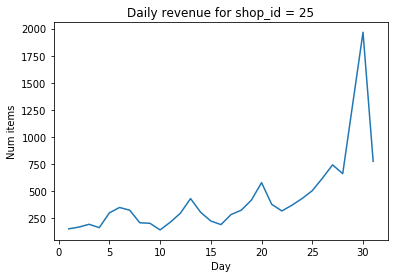

Current answer for task total_num_items_sold_var is: 117167.702299


In [118]:
shop_id = 25

total_num_items_sold = shop25.tolist()# YOUR CODE GOES HERE
days = shop25.index.tolist()# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(shop25.tolist(), ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [95]:
STUDENT_EMAIL = 'amnasri@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'C4C9hBeriJ9AK9s9'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: ----------


In [120]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)